#AutoML

## About Dataset

This dataset contains about 10 years of daily weather observations from numerous Australian weather stations.

**Taget Variable:**<br>
RainTomorrow - The amount of next day rain in mm. Used to

*   RainTomorrow - The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk"

**Independent Variables:**<br>
* Date - Date of observation<br>
* Location - The common name of the location of the weather station<br>
* MinTemp - The minimum temperature in degrees celsius<br>
* MaxTemp - The maximum temperature in degrees celsius<br>
* Rainfall - The amount of rainfall recorded for the day in mm<br>
* Evaporation - The so-called Class A pan evaporation (mm) in the 24 hours to 9am<br>
* Sunshine - The number of hours of bright sunshine in the day.<br>
* WindGustDir - The direction of the strongest wind gust in the 24 hours to midnight<br>
* WindGustSpeed - The speed (km/h) of the strongest wind gust in the 24 hours to midnight<br>
* WindDir9am - Direction of the wind at 9am<br>
* WindDir3pm - Direction of the wind at 3pm<br>
* WindSpeed9am - Wind speed (km/hr) averaged over 10 minutes prior to 9am<br>
* WindSpeed3pm - Wind speed (km/hr) averaged over 10 minutes prior to 3pm<br>
* Humidity9am - Humidity (percent) at 9am<br>
* Humidity3pm - Humidity (percent) at 3pm<br>
* Pressure9am - Atmospheric pressure (hpa) reduced to mean sea level at 9am<br>
* Pressure3pm - Atmospheric pressure (hpa) reduced to mean sea level at 3pm<br>
* Cloud9am - Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many <br>
* Cloud3pm - Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values<br>
* Temp9am - Temperature (degrees C) at 9am<br>
* Temp3pm - Temperature (degrees C) at 3pm<br>
* RainToday - Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0<br>

[Link to Kaggle Dataset](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/discussion)

## Aim of assignment

In this assignment, We will leverage the H2O AutoML library to automatically discover the most suitable model and enhance our learning through the application of various machine learning techniques.

* Is the relationship significant?

* Are any model assumptions violated?

* Is there any multicollinearity in the model?

* In the multivariate models are predictor variables independent of all the other predictor variables?

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

* Does the model make sense?

* Does regularization help?

* Which independent variables are significant?

* Which hyperparameters are important?



In [1]:
!pip install eli5
!pip install -q kaggle


!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=4a19021196c143f12bdebe37506f7a75b4c6c8c45a6f504fe497cba0468c3c87
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 MB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.1-py2.py3-none-any.whl size=257484150 sha256=fe5f924d4da5a77cf32f07d06fee7bb65335400a54794963ff482399e67bfaa1
  Stored in directory: /root/.cache/pip/wheels/d9/9b/ca/7345b72d17e1e17da37239d70631c3214ec9e541b0c9e700e2
Successfully built h2o


In [2]:
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.gbm import H2OGradientBoostingEstimator

import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew

In [117]:
min_mem_size=6
run_time=240
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))

In [118]:
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:41713..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpa9i8ryuv
  JVM stdout: /tmp/tmpa9i8ryuv/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpa9i8ryuv/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:41713
Connecting to H2O server at http://127.0.0.1:41713 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_wgjbcj
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [119]:
local_path = 'https://raw.githubusercontent.com/Asawarikadam44/INFO6105---Data-Science-methods-and-Tools/main/weatherAUS.csv'

In [120]:
df = pd.read_csv(local_path)
df=df.dropna()

df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


## Check multicolinearity

### By using correlation matrix

In [123]:
X_cor = df.loc[:,df.columns!='RainTomorrow']
y_cor = df[['RainTomorrow']]

<Axes: >

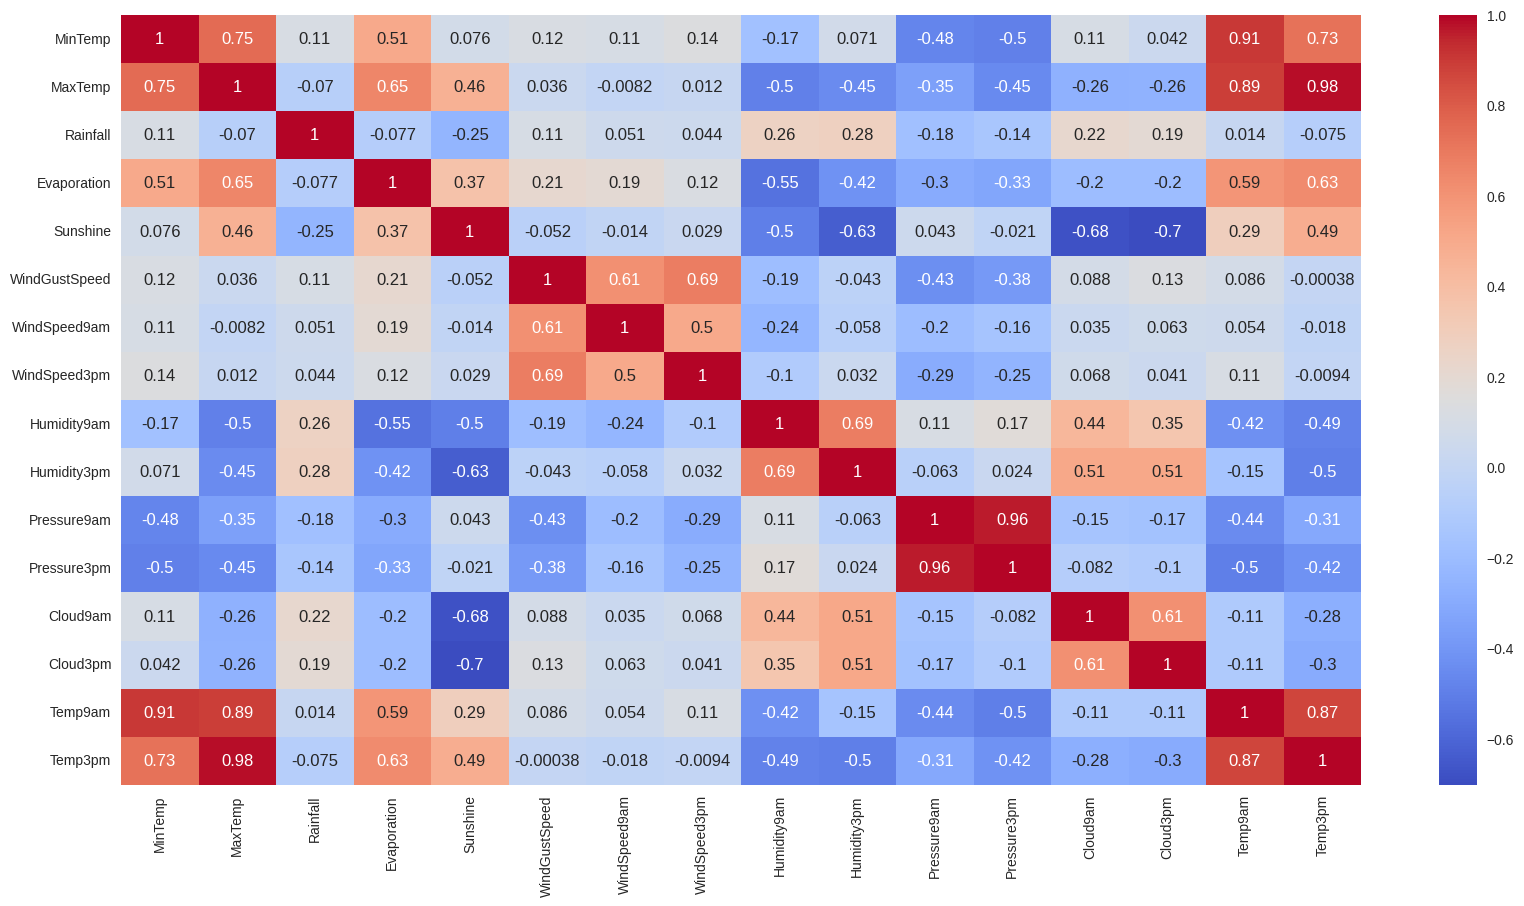

In [124]:
X_cor.corr()

#the heat map of the correlation
plt.figure(figsize=(20,10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')

1. **MinTemp and MaxTemp**: These variables have a strong positive correlation with a coefficient of 0.74.

2. **MinTemp and Temp3pm**: There is a notable positive correlation of 0.71 between MinTemp and Temp3pm.

3. **MinTemp and Temp9am**: The correlation between MinTemp and Temp9am is exceptionally strong, with a coefficient of 0.90.

4. **MaxTemp and Temp9am**: MaxTemp and Temp9am also display a robust positive correlation, having a coefficient of 0.89.

5. **MaxTemp and Temp3pm**: MaxTemp and Temp3pm exhibit a remarkably strong positive correlation, with a coefficient of 0.98.

6. **WindGustSpeed and WindSpeed3pm**: These variables are highly positively correlated, with a coefficient of 0.69.

7. **Pressure9am and Pressure3pm**: Pressure9am and Pressure3pm show a very strong positive correlation, with a coefficient of 0.96.

8. **Temp9am and Temp3pm**: The correlation between Temp9am and Temp3pm is quite strong, with a coefficient of 0.86.

In summary, these pairs of variables demonstrate substantial positive relationships, as indicated by their correlation coefficients.

### By calculating VIF

In [125]:
numerical_columns = df.select_dtypes(include=['int','float','float64']).columns
print(df[numerical_columns].describe())

            MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  56420.000000  56420.000000  56420.000000  56420.000000  56420.000000   
mean      13.464770     24.219206      2.130397      5.503135      7.735626   
std        6.416689      6.970676      7.014822      3.696282      3.758153   
min       -6.700000      4.100000      0.000000      0.000000      0.000000   
25%        8.600000     18.700000      0.000000      2.800000      5.000000   
50%       13.200000     23.900000      0.000000      5.000000      8.600000   
75%       18.400000     29.700000      0.600000      7.400000     10.700000   
max       31.400000     48.100000    206.200000     81.200000     14.500000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   56420.000000  56420.000000  56420.000000  56420.000000  56420.000000   
mean       40.877366     15.667228     19.786778     65.874123     49.601985   
std        13.335232      8.317005      8.510180

In [126]:
# Create a DataFrame to store the VIF results
num = df[numerical_columns].copy()

vif_data = pd.DataFrame()
vif_data["Variable"] = num.columns

# Calculate VIF for each variable
vif_data["VIF"] = [variance_inflation_factor(num.values, i) for i in range(num.shape[1])]

# Exclude the first row (the constant) from the results
vif_data = vif_data[1:]

print(vif_data)


         Variable            VIF
1         MaxTemp     608.110140
2        Rainfall       1.277233
3     Evaporation       7.155897
4        Sunshine      17.318673
5   WindGustSpeed      26.613591
6    WindSpeed9am       8.398002
7    WindSpeed3pm      13.743843
8     Humidity9am      60.250618
9     Humidity3pm      47.801216
10    Pressure9am  423553.613361
11    Pressure3pm  421771.670406
12       Cloud9am       7.361623
13       Cloud3pm       8.318504
14        Temp9am     210.623646
15        Temp3pm     674.506892


These results show the VIF values for each of the independent variables. VIF values greater than 5 or 10 (a common threshold) may indicate multicollinearity issues. In this case, variables such as "Pressure9am" and "Pressure3pm" have extremely high VIF values, suggesting strong multicollinearity, while variables like "Rainfall" have relatively low VIF values, indicating less multicollinearity

##Initializing H2O

### Import and initiate H2O

In [127]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,7 hours 48 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_ku8n02
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.896 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


### Convert Pandas DataFrame to H2O DataFrame

In [128]:
data_h2o = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


This will convert pandas dataframe into H2O dataframe allowing to perform machine learning tasks using H2O's capabilities.

### Describe statistical properties and types

In [129]:
data_h2o.describe()

Rows:56420
Cols:23

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
type,time,enum,real,real,real,real,real,enum,int,enum,enum,int,int,int,int,real,real,int,int,real,real,enum,enum
mins,1193875200000.0,,-6.7,4.1,0.0,0.0,0.0,,9.0,,,2.0,2.0,0.0,0.0,980.5,977.1,0.0,0.0,-0.7,3.7,,
mean,1347862573952.5073,,13.464769585253478,24.219205955334978,2.1303970223325135,5.503135412974088,7.73562566465792,,40.877366182204845,,,15.667227933356953,19.786777738390715,65.87412265154235,49.60198511166261,1017.2395054945066,1014.7955795817077,4.24170506912441,4.326515420063807,18.204961006735292,22.710333215171925,,
maxs,1498348800000.0,,31.4,48.1,206.2,81.2,14.5,,124.0,,,67.0,76.0,100.0,100.0,1040.4,1038.9,8.0,9.0,39.4,46.1,,
sigma,76897631410.93538,,6.416688788530696,6.9706763871089255,7.014822227998485,3.6962822701317473,3.7581533156636424,,13.33523152956427,,,8.317004845694361,8.510180486546117,18.513289228936436,20.19703988286177,6.909356785644107,6.870891684998161,2.797162346749301,2.6472512911763766,6.567991221332225,6.836543115226232,,
zeros,0,,27,0,36709,128,1658,,0,,,0,0,1,3,0,0,5262,3470,1,0,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,2009-01-01 00:00:00,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
1,2009-01-02 00:00:00,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
2,2009-01-04 00:00:00,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No


In [130]:
data_h2o.types

{'Date': 'time',
 'Location': 'enum',
 'MinTemp': 'real',
 'MaxTemp': 'real',
 'Rainfall': 'real',
 'Evaporation': 'real',
 'Sunshine': 'real',
 'WindGustDir': 'enum',
 'WindGustSpeed': 'int',
 'WindDir9am': 'enum',
 'WindDir3pm': 'enum',
 'WindSpeed9am': 'int',
 'WindSpeed3pm': 'int',
 'Humidity9am': 'int',
 'Humidity3pm': 'int',
 'Pressure9am': 'real',
 'Pressure3pm': 'real',
 'Cloud9am': 'int',
 'Cloud3pm': 'int',
 'Temp9am': 'real',
 'Temp3pm': 'real',
 'RainToday': 'enum',
 'RainTomorrow': 'enum'}

In [131]:
data_h2o['RainTomorrow'] = data_h2o['RainTomorrow'].asfactor()

Here, "RainTomorrow" column in H2O data frame is converted to a categorical or factor variable for binary classification, which is common in tasks where we can predict whether it will rain tomorrow or not.

In [132]:
data_h2o['RainTomorrow'].unique()

C1
No
Yes


## Split dataframe to train and test

Splitting the dataframe in train and test data with 80:20 ratio.

In [133]:
# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = data_h2o.split_frame([pct_rows])

In [134]:
#Check the shape of train and test data
print(df_train.shape)
print(df_test.shape)

(44978, 23)
(11442, 23)


In [135]:
#Display all columns in X
X=data_h2o.columns
print(X)

['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


### Seperate Dependent variable from Independent variable

In [136]:
#Seperate Dependent variable from Independent variable
y_numeric ='RainTomorrow'
X.remove(y_numeric)
print(X)

['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


## H2O AutoML

In [156]:
#set the AutoML
aml = H2OAutoML(max_runtime_secs=600, stopping_metric="AUC", max_models=10, seed=1, nfolds=4)

#pass the data through H20AutoML
aml.train(x=X,y=y_numeric,training_frame=df_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),9/10
# GBM base models (used / total),4/4
# XGBoost base models (used / total),3/3
# DRF base models (used / total),1/2
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,4
Metalearner fold_column,None


The model key for this stacked ensemble is "StackedEnsemble_AllModels_1_AutoML_3_20231102_234311". Below is a summary of the key information and performance metrics:

*   Model Type: StackedEnsemble

    Model Key: StackedEnsemble_AllModels_1_AutoML_3_20231102_234311


*   **ModelMetricsBinomialGLM on Train Data**:
    
    Mean Squared Error (MSE): 0.0544

    Root Mean Squared Error (RMSE): 0.2332
    
    Log Loss: 0.1924
    
    Area Under the Receiver Operating Characteristic Curve (AUC): 0.9766

    Area Under the Precision-Recall Curve (AUCPR): 0.9352


*   **Confusion Matrix on Train Data:**

    True Negatives (TN): 7402

    False Positives (FP): 359

    False Negatives (FN): 299

    True Positives (TP): 1909


*   **ModelMetricsBinomialGLM on Cross-Validation Data:**

    Mean Squared Error (MSE): 0.0955

    Root Mean Squared Error (RMSE): 0.3091

    Log Loss: 0.3069

    Area Under the Receiver Operating Characteristic Curve (AUC): 0.9054

    Area Under the Precision-Recall Curve (AUCPR): 0.7678


This stacked ensemble model demonstrates strong predictive performance on both the training and cross-validation datasets, as indicated by high AUC and AUCPR values. The model combines predictions from a variety of base models, effectively utilizing their diverse strengths to improve overall performance.

### Display Leaderboard

In [157]:
lb = aml.leaderboard
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_5_20231103_03009,0.905492,0.305268,0.767298,0.192881,0.308127,0.0949425
StackedEnsemble_BestOfFamily_1_AutoML_5_20231103_03009,0.902965,0.308586,0.763463,0.19622,0.309869,0.0960187
GBM_2_AutoML_5_20231103_03009,0.899691,0.315496,0.756113,0.200091,0.312274,0.097515
GBM_1_AutoML_5_20231103_03009,0.899575,0.315907,0.755086,0.201314,0.312715,0.0977906
GBM_3_AutoML_5_20231103_03009,0.898116,0.317314,0.750872,0.203402,0.31348,0.0982699
XGBoost_3_AutoML_5_20231103_03009,0.89804,0.315231,0.75345,0.200791,0.31339,0.0982133
GBM_4_AutoML_5_20231103_03009,0.89777,0.319007,0.749717,0.200542,0.314957,0.0991976
DRF_1_AutoML_5_20231103_03009,0.895702,0.340647,0.747494,0.200177,0.31564,0.0996284
XGBoost_2_AutoML_5_20231103_03009,0.893917,0.325405,0.740755,0.206399,0.318366,0.101357
XGBoost_1_AutoML_5_20231103_03009,0.893317,0.326573,0.739417,0.211226,0.318616,0.101516


The top-performing model is the "StackedEnsemble_AllModels_1," which achieved the highest AUC (Area Under the ROC Curve) of 0.9054. AUC is a measure of a model's ability to distinguish between positive and negative classes, with higher values indicating better performance.

AUC-PR: The "StackedEnsemble_AllModels_1" model also has the highest AUC-PR (Area Under the Precision-Recall Curve) of 0.7678. AUC-PR measures a model's precision and recall performance, particularly important when dealing with imbalanced datasets.

In this leaderboard, the best performing model is:
The "StackedEnsemble_AllModels_1" outperforms other

1.   StackedEnsemble_AllModels_1
2.   StackedEnsemble_BestOfFamily_1


In summary, the "StackedEnsemble_AllModels_1" appears to be the best model for the binary classification task of predicting whether it will rain tomorrow, based on the provided performance metrics.

In [158]:
lb = h2o.automl.get_leaderboard(aml, extra_columns="ALL")
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_5_20231103_03009,0.905492,0.305268,0.767298,0.192881,0.308127,0.0949425,15313,0.046893,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_5_20231103_03009,0.902965,0.308586,0.763463,0.19622,0.309869,0.0960187,14076,0.061486,StackedEnsemble
GBM_2_AutoML_5_20231103_03009,0.899691,0.315496,0.756113,0.200091,0.312274,0.097515,1815,0.006442,GBM
GBM_1_AutoML_5_20231103_03009,0.899575,0.315907,0.755086,0.201314,0.312715,0.0977906,2765,0.007755,GBM
GBM_3_AutoML_5_20231103_03009,0.898116,0.317314,0.750872,0.203402,0.31348,0.0982699,2054,0.006949,GBM
XGBoost_3_AutoML_5_20231103_03009,0.89804,0.315231,0.75345,0.200791,0.31339,0.0982133,2140,0.001896,XGBoost
GBM_4_AutoML_5_20231103_03009,0.89777,0.319007,0.749717,0.200542,0.314957,0.0991976,2680,0.008291,GBM
DRF_1_AutoML_5_20231103_03009,0.895702,0.340647,0.747494,0.200177,0.31564,0.0996284,6207,0.014256,DRF
XGBoost_2_AutoML_5_20231103_03009,0.893917,0.325405,0.740755,0.206399,0.318366,0.101357,3176,0.002614,XGBoost
XGBoost_1_AutoML_5_20231103_03009,0.893317,0.326573,0.739417,0.211226,0.318616,0.101516,6291,0.002845,XGBoost


##Compare Models

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_5_20231103_03009,0.905492,0.305268,0.767298,0.192881,0.308127,0.0949425,15313,0.046893,StackedEnsemble
GBM_2_AutoML_5_20231103_03009,0.899691,0.315496,0.756113,0.200091,0.312274,0.097515,1815,0.006442,GBM
XGBoost_3_AutoML_5_20231103_03009,0.89804,0.315231,0.75345,0.200791,0.31339,0.0982133,2140,0.001896,XGBoost
GLM_1_AutoML_5_20231103_03009,0.890654,0.327102,0.7322,0.204948,0.319274,0.101936,2398,0.00079,GLM


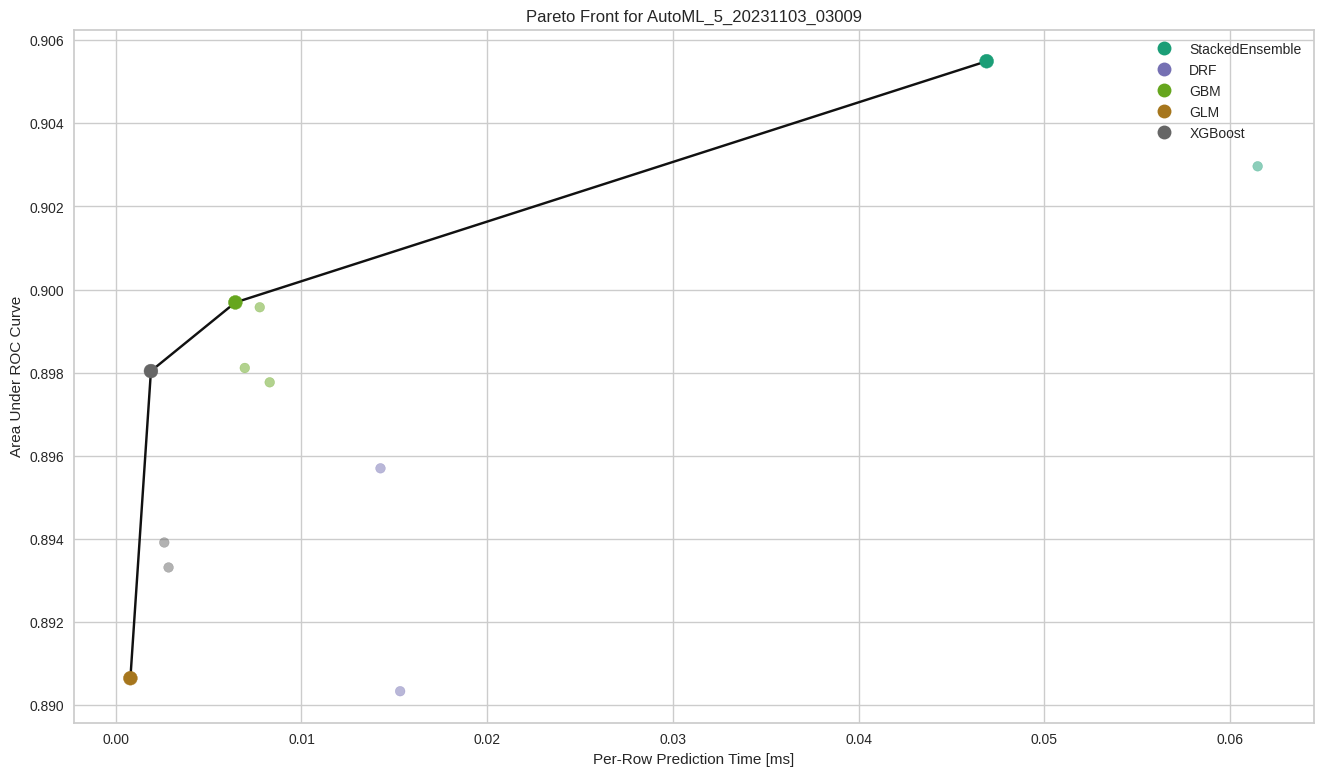

In [159]:
pf = aml.pareto_front()
pf.figure()
pf

The Stacked Ensemble model shows the highest AUC (0.9055) and AUC-PR (0.7673), indicating excellent predictive performance. It also has the lowest log loss (0.3053) and Mean Squared Error (MSE) of 0.0949.

The Gradient Boosting Machine (GBM) and XGBoost models also perform well, with competitive AUC values (0.8997 and 0.8980, respectively).

The Stacked Ensemble has the lowest mean per class error (0.1929), indicating that it provides balanced and accurate predictions across different classes.

The prediction time per row is fastest for XGBoost (0.0019 ms per row), making it efficient for real-time or large-scale prediction tasks. GLM is also quite efficient in terms of prediction time.

GBM and XGBoost offer a good balance between predictive accuracy and efficiency, making them practical choices for many real-world scenarios.

In [161]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

{'StackedEnsemble_AllModels_1_AutoML_5_20231103_03009': 0,
 'StackedEnsemble_BestOfFamily_1_AutoML_5_20231103_03009': 1,
 'GBM_2_AutoML_5_20231103_03009': 2,
 'GLM_1_AutoML_5_20231103_03009': 10}

In [162]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])

2


In [163]:
best_model.algo

'gbm'

In [186]:
best_model.train(x=X,y=y_numeric,training_frame=df_train)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1698942143345_7972


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          22051                  5            5            5             23            32            30.42

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0884861799807316
RMSE: 0.2974662669627123
LogLoss: 0.2905357848102206
Mean Per-Class Error: 0.18085577722752905
AUC: 0.9174212832491628
AUCPR: 0.8016730117031001
Gini: 0.8348425664983257

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3391354326777375
       No     Yes    Error    Rate
-----  -----  -----  -------  ----------------
No     31769  3290   0.0938   (3290.0/35059.0)
Yes    2657   7262   0.2679   (2657.0/9919.0)
Total  34426  10552  0.1322   (5947.0/44978.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.339135     0.709491  207
max f2                       0.164537     0.778461  285
max f0point5                 0.571951     0.755806  128
max accuracy                 0.441934     0.878096  170
max precision                0.97152      1         0
max recall                   0.0139603    1         396
max specificity              0.97152      1         0
max absolute_mcc             0.412069     0.630568  181
max min_per_class_accuracy   0.226917     0.832283  254
max mean_per_class_accuracy  0.231381     0.833902  252
max tns                      0.97152      35059     0
max fns                      0.97152      9905      0
max fps                      0.0112829    35059     399
max tps                      0.0139603    9919      396
max tnr                      0.97152      1         0
max fnr                      0.97152      0.998589  0
max fpr                      0.0112829    1         399
max tpr                      0.0139603    1         396

Gains/Lift Table: Avg response rate: 22.05 %, avg score: 22.07 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100049                   0.944114           4.52445     4.52445            0.997778         0.954271   0.997778                    0.954271            0.0452667       0.0452667                  352.445   352.445            0.0452381
2        0.0200098                   0.926813           4.5043      4.51438            0.993333         0.935438   0.995556                    0.944855            0.045065        0.0903317                  350.43    351.438            0.0902176
3        0.0300147                   0.907194           4.5043      4.51102            0.993333         0.91745    0.994815                    0.93572             0.045065        0.135397                   350.43    351.102            0.135197
4        0.0400196                   0.884131           4.3733      4.47659            0.964444         0.89641    0.987222                    0.925893            0.0437544       0.179151                   337.33    347.659            0.178495
5        0.0500022                   0.856366           4.35274     4.45186            0.959911         0.869936   0


True Positives (TP): 7262.0

True Negatives (TN): 31769.0

total number of predictions made (Total) :44978.0


Accuracy = (TP + TN) / Total
Accuracy = (7262.0 + 31769.0) / 44978.0

Calculating the accuracy value:

Accuracy = 39031.0 / 44978.0 ≈ 0.8674

So, the accuracy of the model with the above data is approximately 0.8674 or 86.74%. This means that the model correctly predicts the target variable in about **86.74%** of the cases on the training data.

##Examine Models

In [164]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

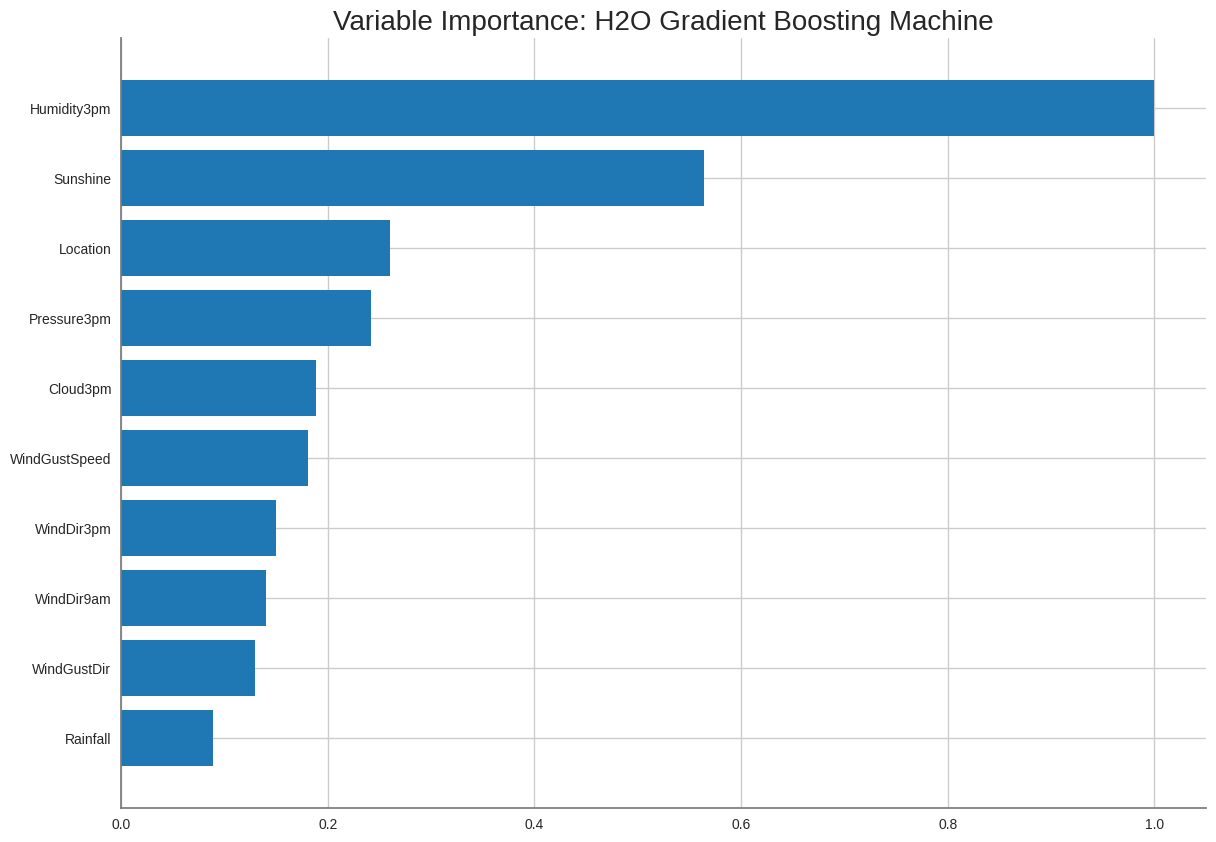

<Figure size 800x550 with 0 Axes>

In [165]:
if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()


The variable importance analysis suggests that "Humidity3pm" is the most influential feature among all the variables, with an importance score of 1.0. This signifies that changes in "Humidity3pm" have a substantial impact on the model's predictions. Additionally, "Sunshine" and "Location" are identified as the next two significant variables contributing to the model's performance. These findings imply that these features play a crucial role in determining the model's predictive accuracy of 'RainTomorrrow'

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_5_20231103_03009,0.900904,0.311617,0.754325,0.191074,0.311585,0.0970849,15313,0.048894,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_5_20231103_03009,0.897974,0.315154,0.750173,0.193449,0.313294,0.0981534,14076,0.040437,StackedEnsemble
GBM_1_AutoML_5_20231103_03009,0.895271,0.320856,0.742398,0.19766,0.315757,0.0997027,2765,0.008249,GBM
XGBoost_3_AutoML_5_20231103_03009,0.894522,0.31972,0.742537,0.199133,0.315701,0.099667,2140,0.00247,XGBoost
GBM_2_AutoML_5_20231103_03009,0.894385,0.321923,0.74221,0.203057,0.316088,0.0999116,1815,0.007536,GBM
GBM_3_AutoML_5_20231103_03009,0.893983,0.322263,0.74118,0.197759,0.316597,0.100234,2054,0.007443,GBM
GBM_4_AutoML_5_20231103_03009,0.892469,0.32645,0.733596,0.203127,0.31923,0.101908,2680,0.009032,GBM
XGBoost_2_AutoML_5_20231103_03009,0.890863,0.329245,0.729978,0.210468,0.320311,0.102599,3176,0.003031,XGBoost
DRF_1_AutoML_5_20231103_03009,0.890861,0.346386,0.739009,0.212521,0.317631,0.100889,6207,0.015763,DRF
XGBoost_1_AutoML_5_20231103_03009,0.890688,0.33003,0.732191,0.20211,0.320593,0.10278,6291,0.003452,XGBoost


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_5_20231103_03009

,No,Yes,Error,Rate
No,7846.0,1088.0,0.1218,(1088.0/8934.0)
Yes,653.0,1855.0,0.2604,(653.0/2508.0)
Total,8499.0,2943.0,0.1522,(1741.0/11442.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

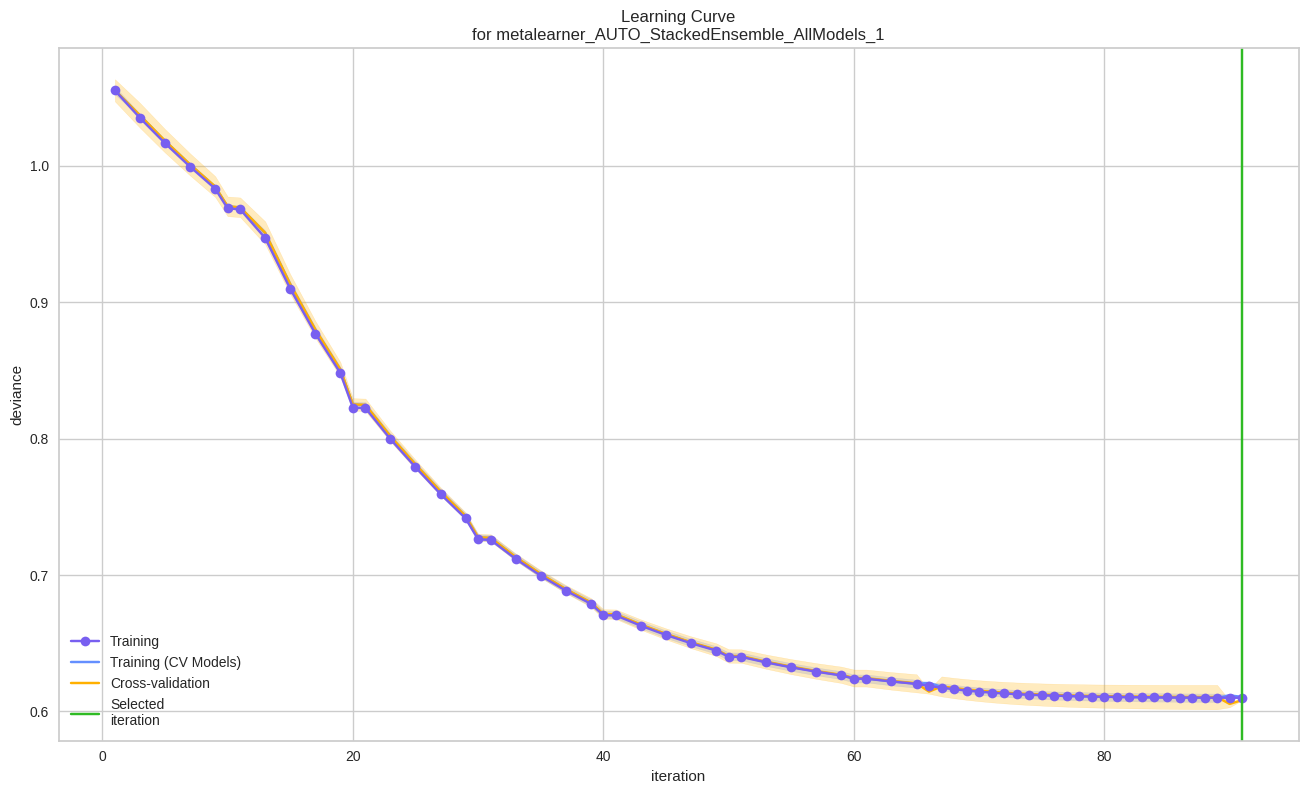

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

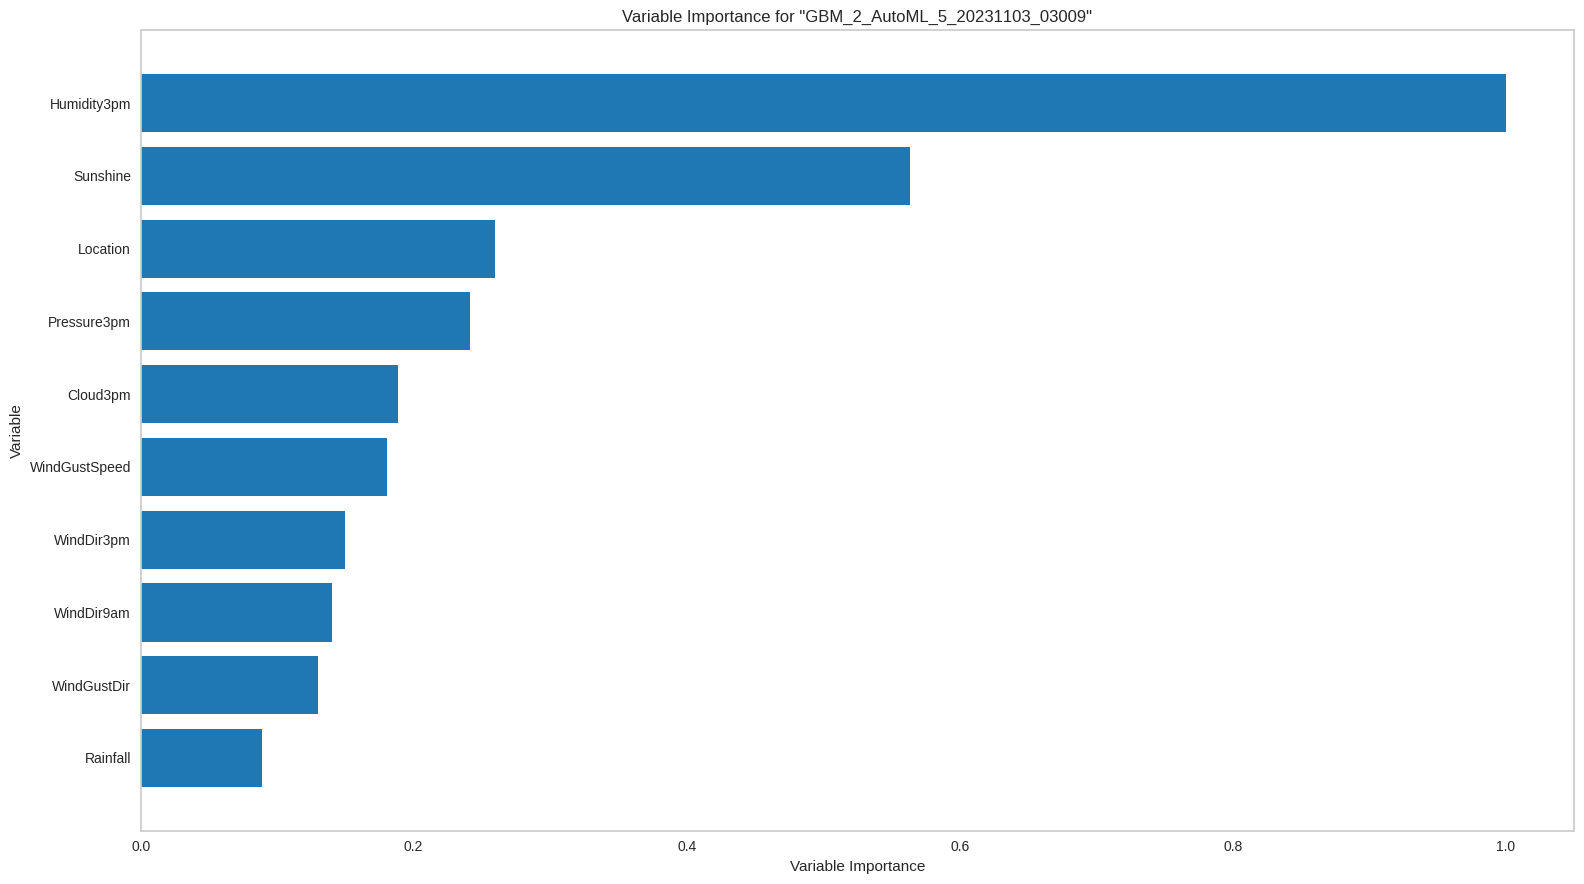

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

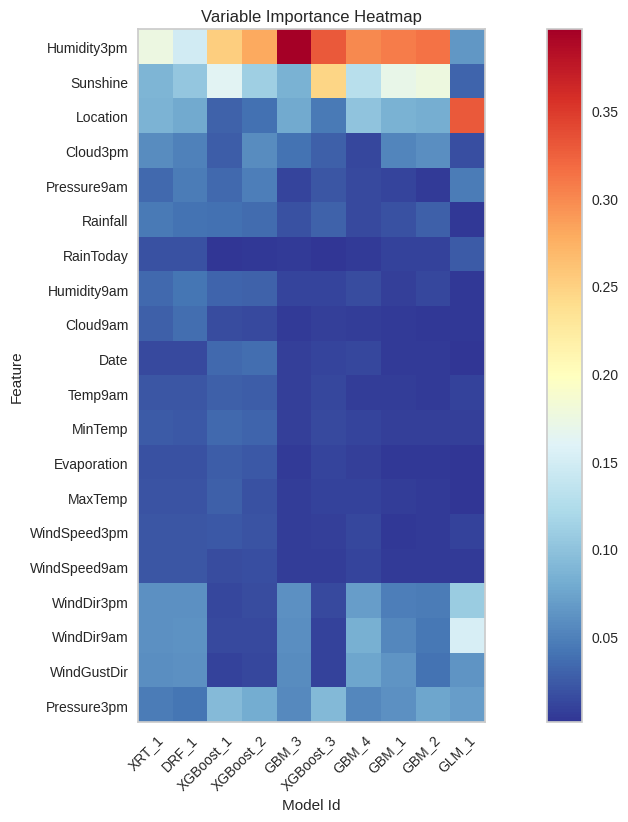

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

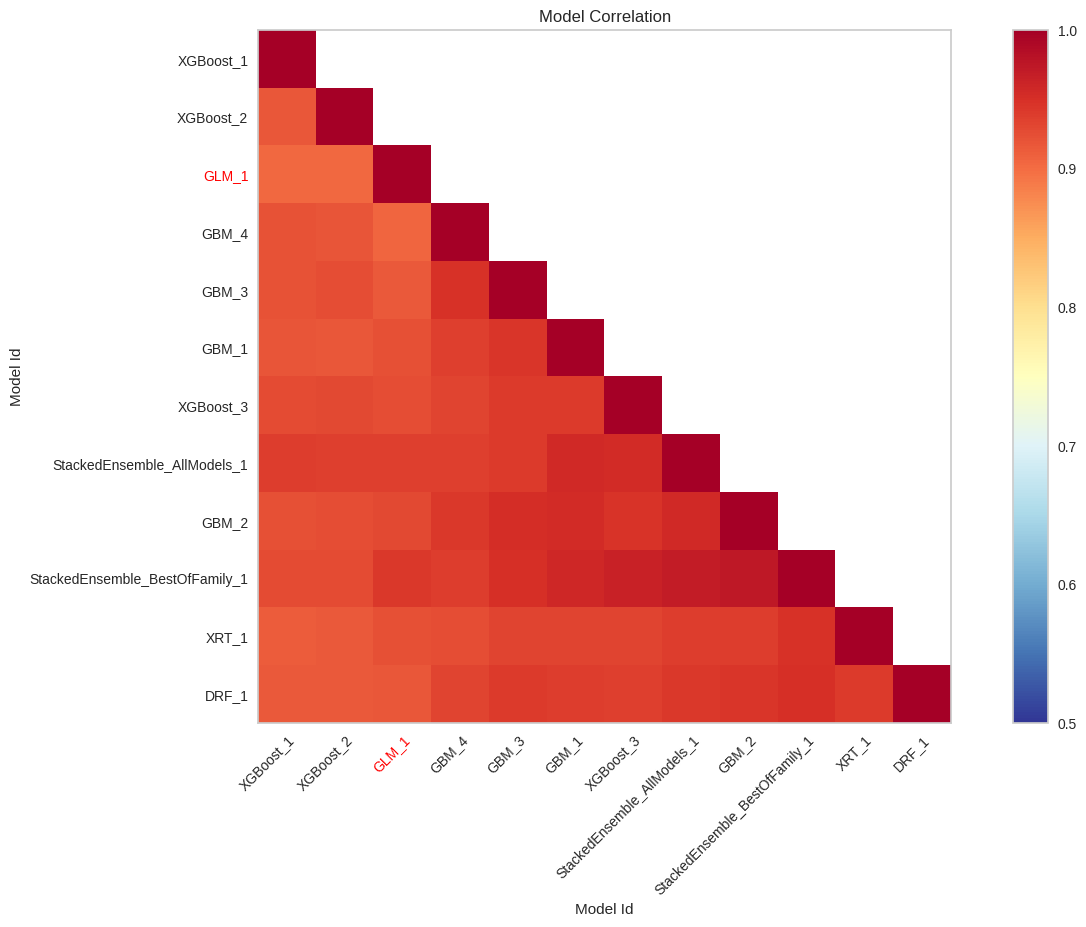

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

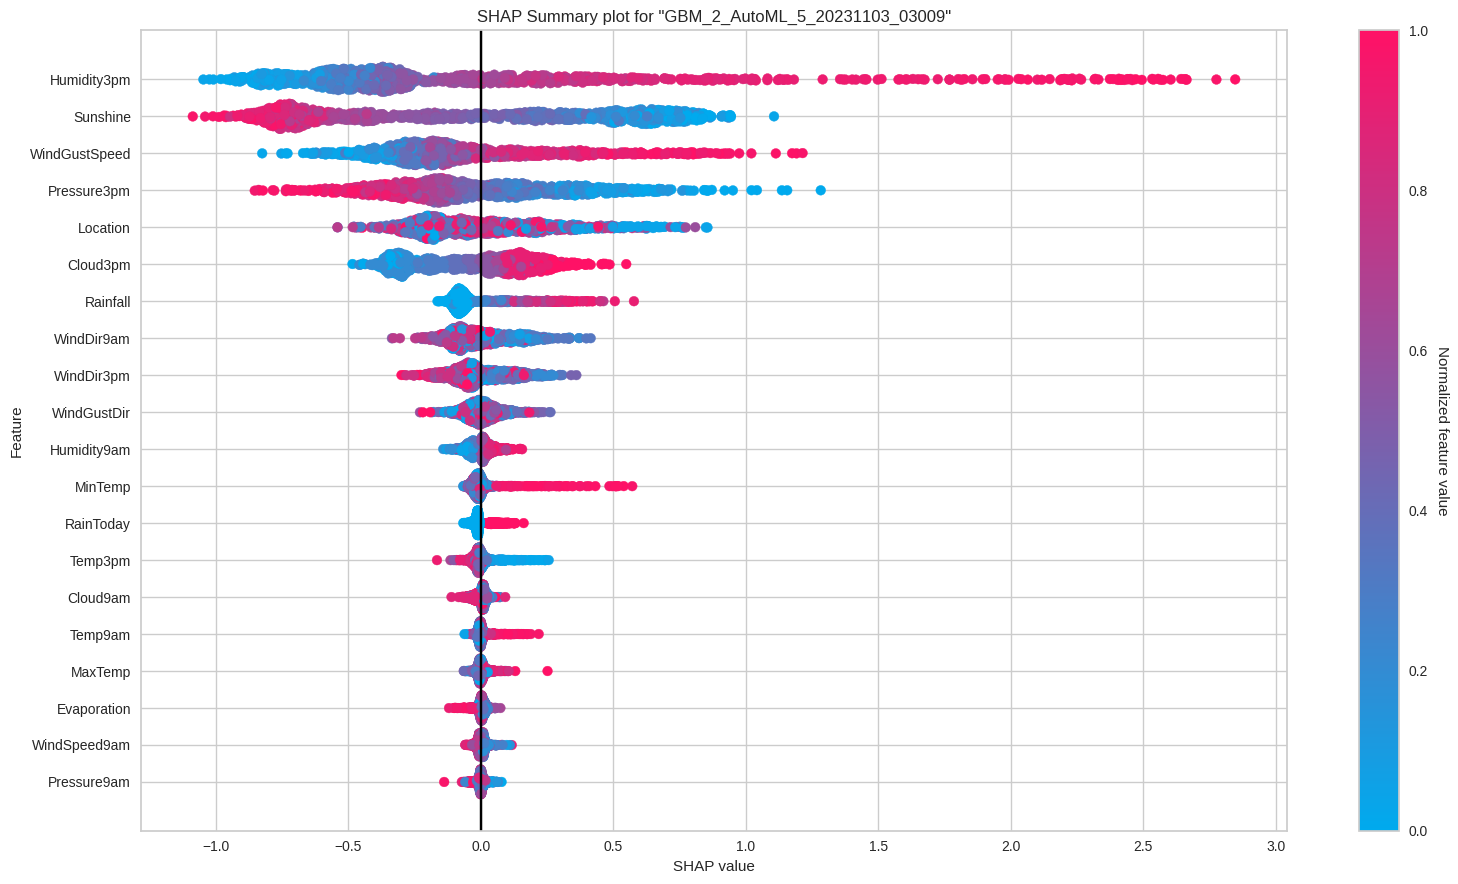

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

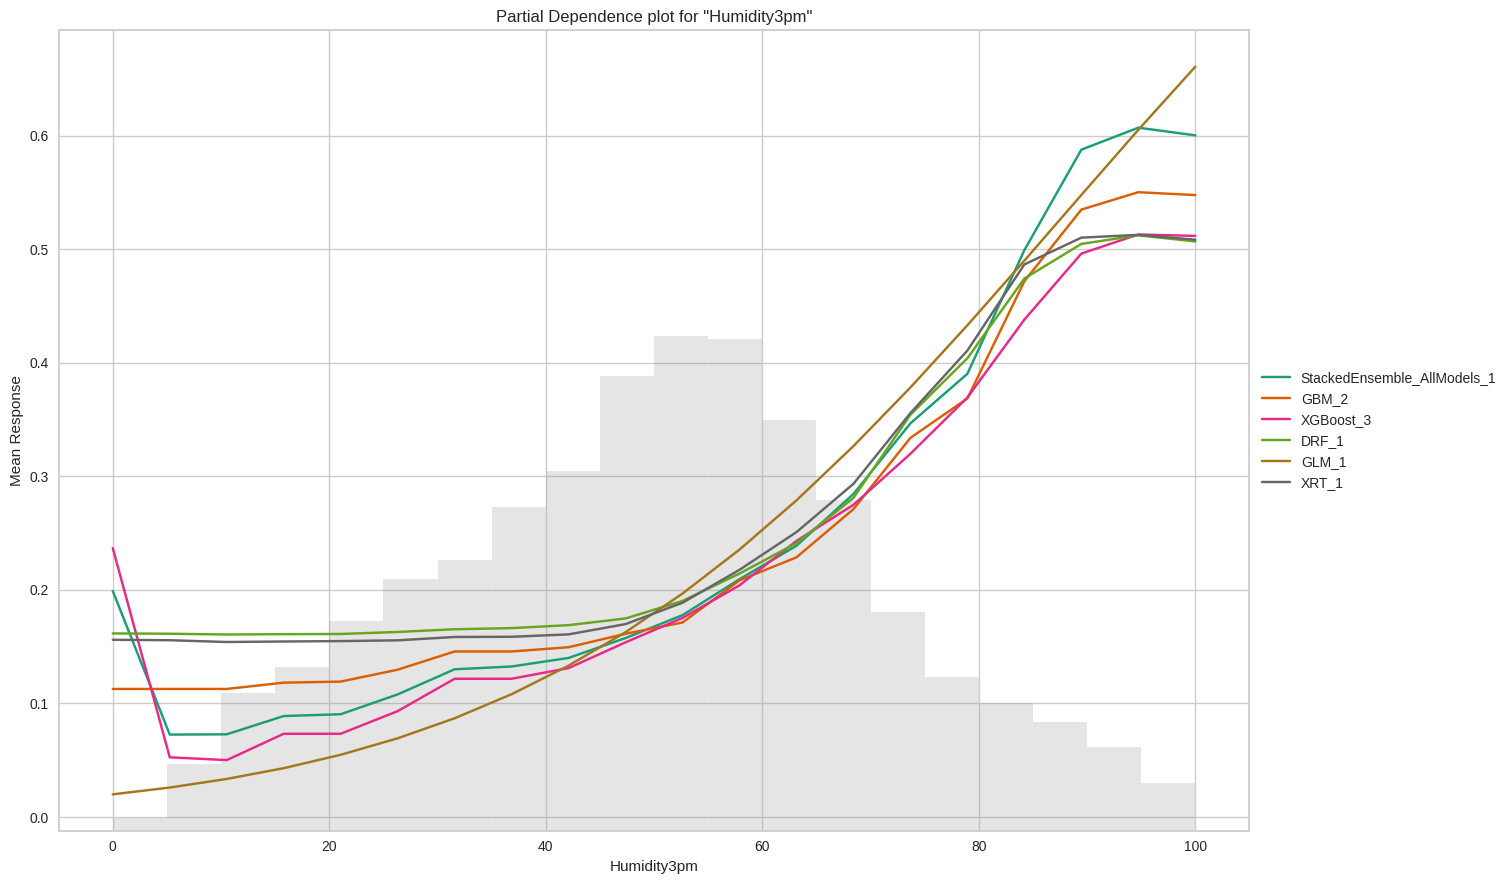

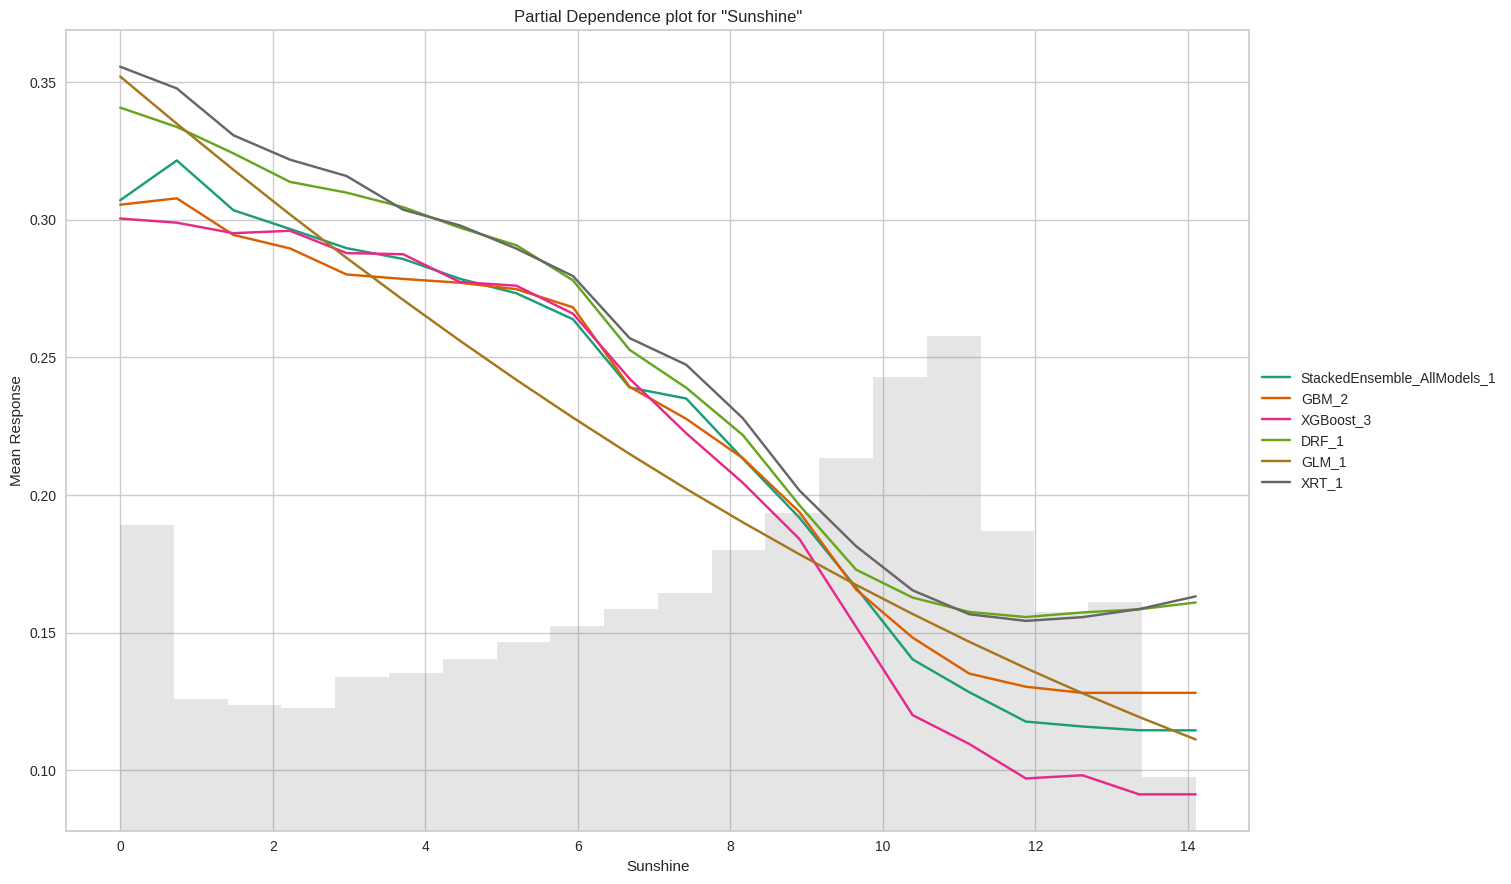

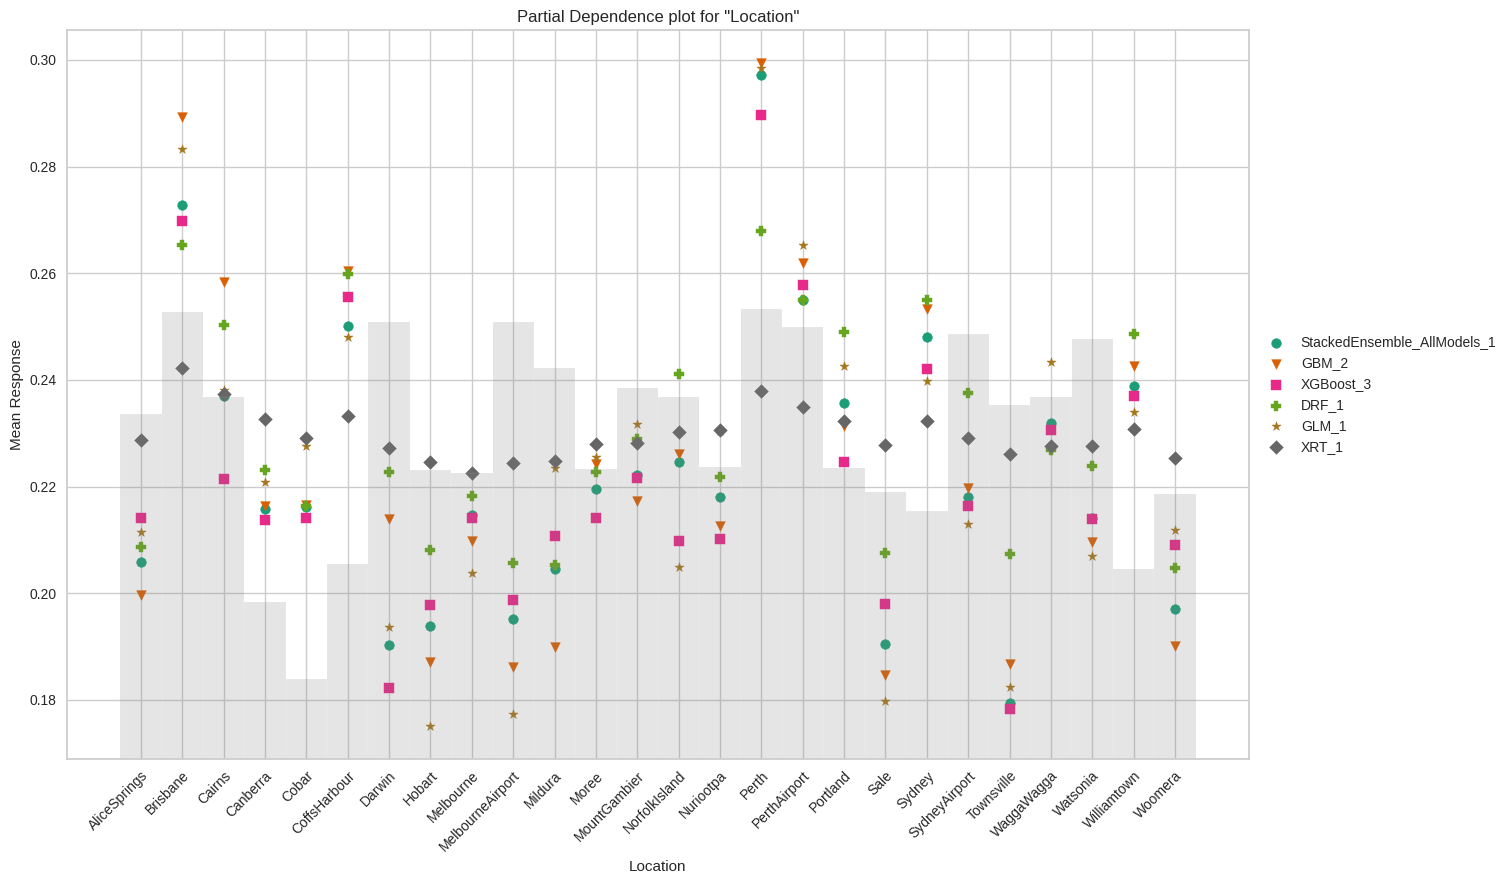

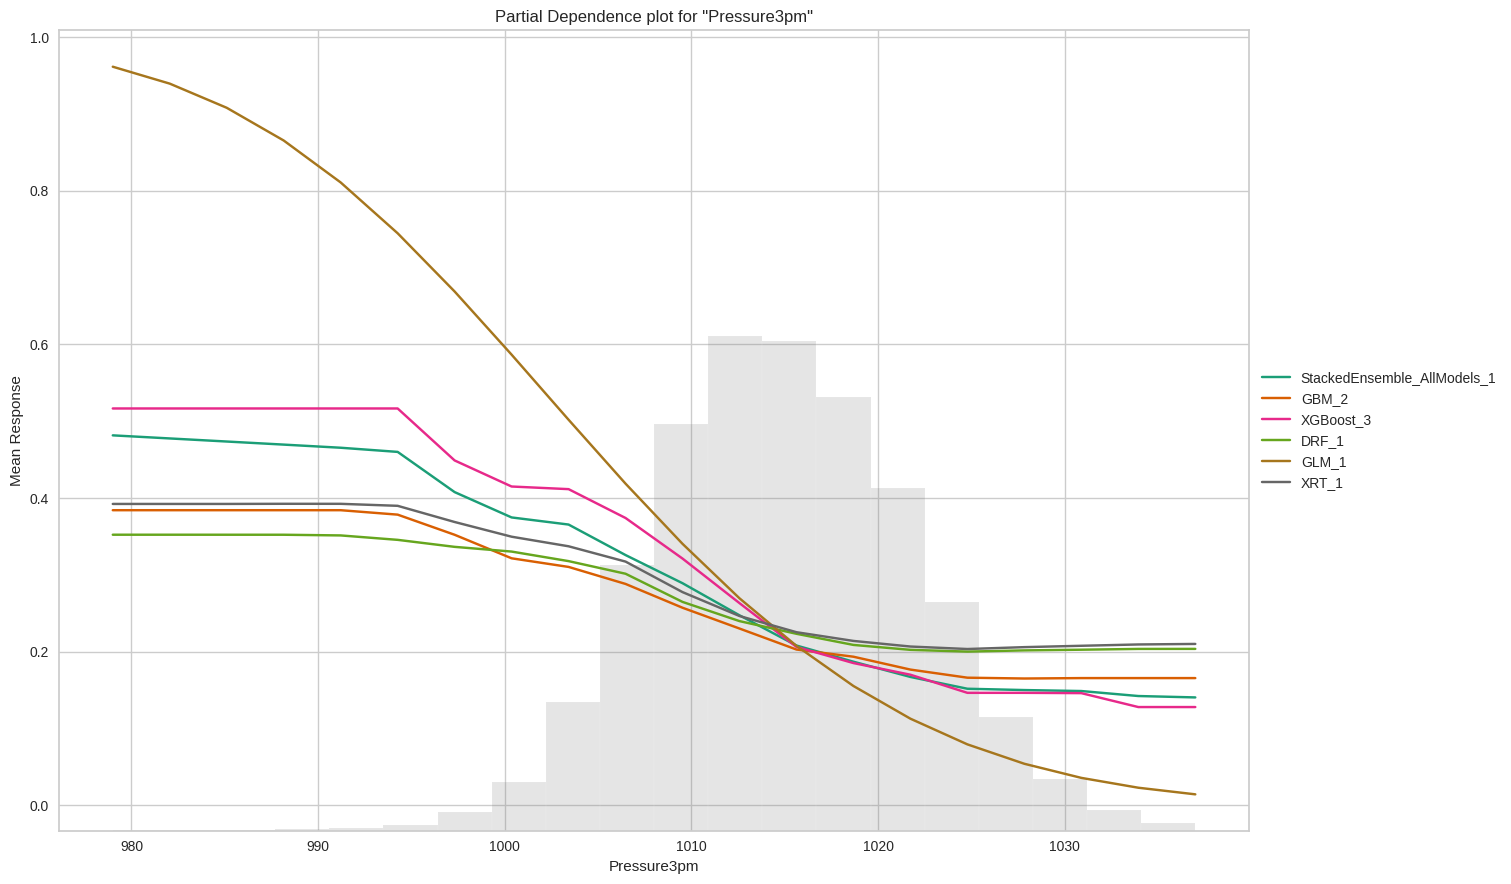

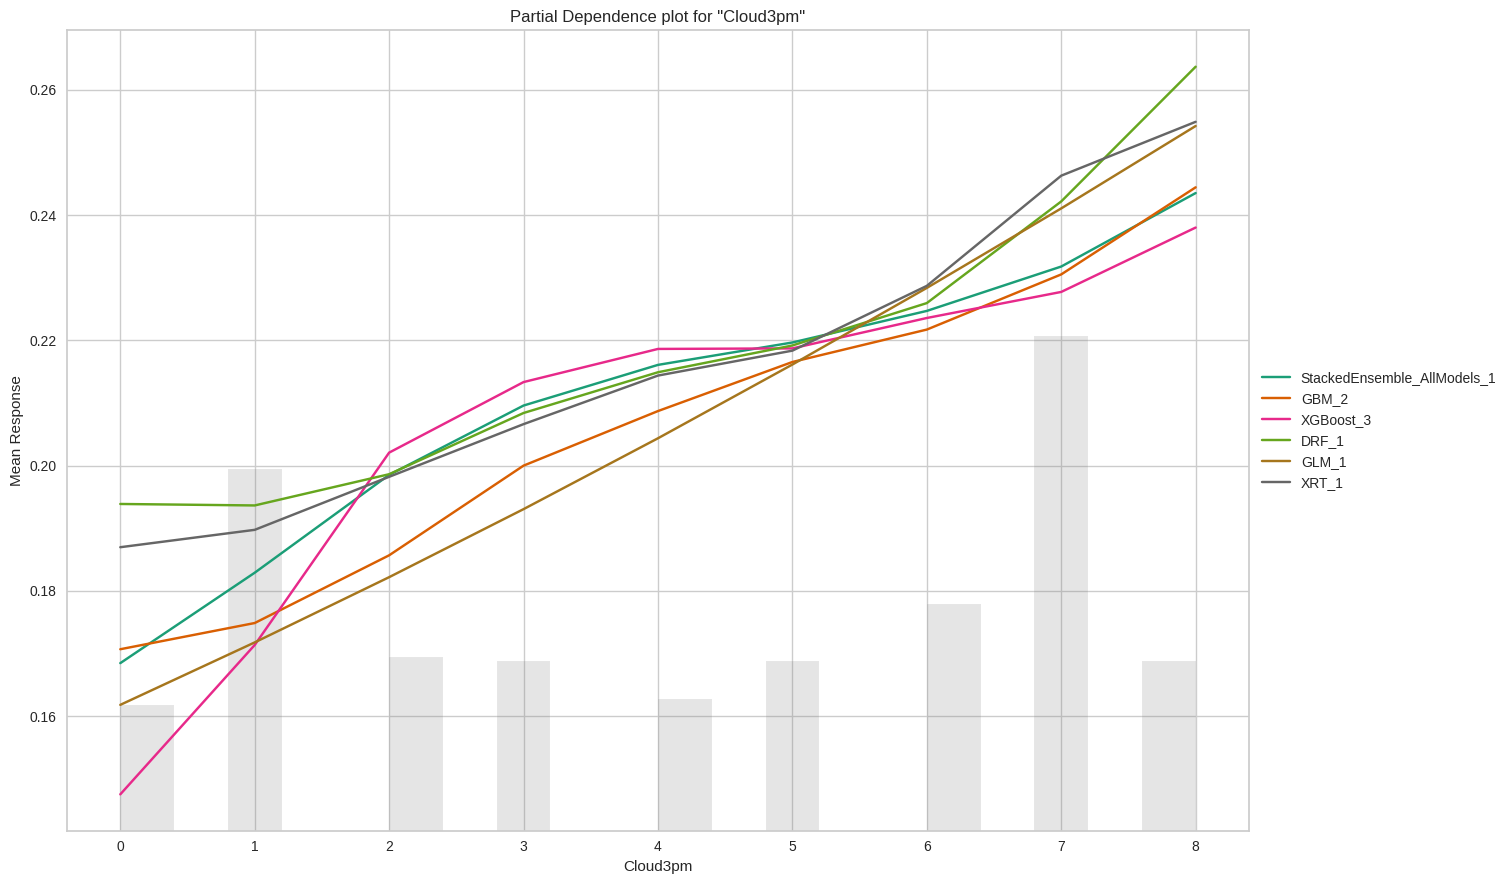

In [166]:
explain_model = aml.explain(frame = df_test)

## Regularization

###L1 (Lasso) regularization

In [179]:
# Create an H2OGeneralizedLinearEstimator with L1 (Lasso) regularization
model_lasso = H2OGeneralizedLinearEstimator(
    family="Binomial",
    alpha=1,  # Adjust the alpha value for L1 regularization
    nfolds=5
)

# Train the model
model_lasso.train(x=X,y=y_numeric,training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1698942143345_7936


GLM Model: summary
    family    link    regularization             number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  -------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Lasso (lambda = 1.89E-4 )  93                            75                             6                       py_674_sid_8e2a

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.10134601508235051
RMSE: 0.3183488889290341
LogLoss: 0.32530948929031017
AUC: 0.8919999219784824
AUCPR: 0.7350909787131127
Gini: 0.7839998439569649
Null degrees of freedom: 44977
Residual degrees of freedom: 44902
Null deviance: 47458.805956781835
Residual deviance: 29263.540418599143
AIC: 29415.540418599143

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3116942864295271
       No     Yes    Error    Rate
-----  -----  -----  -------  ----------------
No     30725  4334   0.1236   (4334.0/35059.0)
Yes    2807   7112   0.283    (2807.0/9919.0)
Total  33532  11446  0.1588   (7141.0/44978.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.311694     0.665762  219
max f2                       0.131839     0.750276  298
max f0point5                 0.545407     0.696883  139
max accuracy                 0.527858     0.858442  145
max precision                0.997004     1         0
max recall                   0.00577168   1         396
max specificity              0.997004     1         0
max absolute_mcc             0.362922     0.567526  199
max min_per_class_accuracy   0.213049     0.806634  258
max mean_per_class_accuracy  0.202625     0.807901  263
max tns                      0.997004     35059     0
max fns                      0.997004     9892      0
max fps                      0.00285977   35059     399
max tps                      0.00577168   9919      396
max tnr                      0.997004     1         0
max fnr                      0.997004     0.997278  0
max fpr                      0.00285977   1         399
max tpr                      0.00577168   1         396

Gains/Lift Table: Avg response rate: 22.05 %, avg score: 22.05 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100049                   0.965285           4.38338    4.38338            0.966667         0.98008     0.966667                    0.98008             0.0438552       0.0438552                  338.338   338.338            0.0434274
2        0.0200098                   0.936831           4.28261    4.333              0.944444         0.950953    0.955556                    0.965517            0.0428471       0.0867023                  328.261   333.3              0.0855614
3        0.0300147                   0.910117           4.28261    4.3162             0.944444         0.924162    0.951852                    0.951732            0.0428471       0.129549                   328.261   331.62             0.127695
4        0.0400196                   0.882598           4.12138    4.2675             0.908889         0.896669    0.941111                    0.937966            0.041234        0.170783                   312.138   326.75             0.


Training_classification_error for iteration 6: 0.1587665
This value represents the training classification error, which is complementary to accuracy. To calculate accuracy:

Accuracy = 1 - Training Classification Error
Accuracy = 1 - 0.1587665
Accuracy ≈ 0.8412335

So, the accuracy of the model, based on the above data, is approximately **84.12%**.

###L0 (Ridge) regularization

In [181]:
# Create an H2OGeneralizedLinearEstimator with L0 (Ridge) regularization
model_ridge = H2OGeneralizedLinearEstimator(
    family="binomial",
    alpha=0,  # Adjust the alpha value for L1 regularization
    nfolds=5,
)

# Train the model
model_ridge.train(x=X,y=y_numeric,training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1698942143345_7954


GLM Model: summary
    family    link    regularization              number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  --------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Ridge ( lambda = 1.89E-4 )  93                            93                             5                       py_674_sid_8e2a

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.10126128780821096
RMSE: 0.318215788119023
LogLoss: 0.32502467048409894
AUC: 0.8922482223239191
AUCPR: 0.735369467396691
Gini: 0.7844964446478382
Null degrees of freedom: 44977
Residual degrees of freedom: 44884
Null deviance: 47458.805956781835
Residual deviance: 29237.919258067603
AIC: 29425.919258067603

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3025253724548887
       No     Yes    Error    Rate
-----  -----  -----  -------  ----------------
No     30565  4494   0.1282   (4494.0/35059.0)
Yes    2709   7210   0.2731   (2709.0/9919.0)
Total  33274  11704  0.1601   (7203.0/44978.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.302525     0.666882  223
max f2                       0.140428     0.750735  296
max f0point5                 0.577593     0.696831  129
max accuracy                 0.526035     0.858664  146
max precision                0.997005     1         0
max recall                   0.00507536   1         396
max specificity              0.997005     1         0
max absolute_mcc             0.365577     0.568874  198
max min_per_class_accuracy   0.211663     0.806412  262
max mean_per_class_accuracy  0.207246     0.807602  264
max tns                      0.997005     35059     0
max fns                      0.997005     9890      0
max fps                      0.00261519   35059     399
max tps                      0.00507536   9919      396
max tnr                      0.997005     1         0
max fnr                      0.997005     0.997076  0
max fpr                      0.00261519   1         399
max tpr                      0.00507536   1         396

Gains/Lift Table: Avg response rate: 22.05 %, avg score: 22.05 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100049                   0.966351           4.39346    4.39346            0.968889         0.980688    0.968889                    0.980688            0.043956        0.043956                   339.346   339.346            0.0435567
2        0.0200098                   0.938416           4.26246    4.32796            0.94             0.952315    0.954444                    0.966502            0.0426454       0.0866015                  326.246   332.796            0.085432
3        0.0300147                   0.912134           4.29269    4.3162             0.946667         0.925217    0.951852                    0.95274             0.0429479       0.129549                   329.269   331.62             0.127695
4        0.0400196                   0.883643           4.13146    4.27002            0.911111         0.898051    0.941667                    0.939068            0.0413348       0.170884                   313.146   327.002            0.


training_classification_error for iteration 6: 0.1601450
This value represents the training classification error, which is complementary to accuracy. To calculate accuracy:

Accuracy = 1 - Training Classification Error
Accuracy = 1 - 0.1601450
Accuracy ≈ 0.839855

So, the accuracy of the model, based on the above data, is approximately 83.98%.

### Which regularization works better ?

* Without Regularization (86% Accuracy): An accuracy of 86% indicates that the model performs relatively well on the training data. However, it may also imply that the model is somewhat overfitting the training data, meaning it may not generalize as well to new, unseen data.


* Lasso Regularization (84% Accuracy): Lasso (L1) regularization adds a penalty term to the model's loss function that encourages some of the model's coefficients to become exactly zero. This has a feature selection effect, meaning it selects a subset of the most important features and discards others. The decrease in accuracy (from 86% to 84%) suggests that some features were considered important by the non-regularized model but are set to zero by Lasso regularization.


* Ridge Regularization (83% Accuracy): Ridge (L2) regularization adds a penalty term that discourages large coefficients but does not force them to be exactly zero. It's effective in preventing multicollinearity among features. The decrease in accuracy (from 86% to 83%) suggests that Ridge regularization is constraining the model's coefficients to a greater extent compared to the non-regularized model.

##Q & A

1) Is the relationship significant?
  
  * MinTemp and MaxTemp: There is a significant positive correlation with a coefficient of 0.74.

  * MinTemp and Temp3pm: The relationship is significant with a positive correlation of 0.71.

  * MinTemp and Temp9am: The correlation is exceptionally significant, with a coefficient of 0.90.

  * MaxTemp and Temp9am: The relationship is also highly significant, with a positive correlation coefficient of 0.89.

  * MaxTemp and Temp3pm: This pair exhibits an extremely significant positive correlation, with a coefficient of 0.98.

  * WindGustSpeed and WindSpeed3pm: These variables are significantly positively correlated, with a coefficient of 0.69.

  * Pressure9am and Pressure3pm: The relationship between these variables is very significant, with a coefficient of 0.96.

  * Temp9am and Temp3pm: The correlation between these variables is quite significant, with a coefficient of 0.86.

  In summary, all these pairs of variables show significant and strong positive relationships, as indicated by their correlation coefficients.







2) Are any model assumptions violated?
  A commonly used threshold for detecting high multicollinearity is a VIF value greater than 10. In your table, several variables have VIF values significantly above 10.

  Here are the variables with VIF values greater than 10:

  * MaxTemp: VIF = 608.11

  * WindGustSpeed: VIF = 26.61

  * WindSpeed3pm: VIF = 13.74

  * Temp9am: VIF = 210.62

  * Temp3pm: VIF = 674.51

Variables with such high VIF values can violate the assumptions of multicollinearity in regression analysis. Multicollinearity assumptions suggest that predictor variables should be reasonably independent from each other. High multicollinearity can lead to difficulties in interpreting the coefficients and identifying the individual effect of each predictor on the response variable.



3) Is there any multicollinearity in the model?

It's evident that variables such as Pressure9am, Pressure3pm, Temp9am, Temp3pm, and MaxTemp exhibit high Variance Inflation Factors (VIF), indicating strong multicollinearity. To mitigate this issue, we should consider applying regularization techniques to either eliminate or transform these variables, thereby reducing their pronounced impact on the model.




4) In the multivariate models are predictor variables independent of all the other predictor variables?

Given the elevated VIF values, it's evident that certain predictor variables are interdependent and not entirely independent of one another.



5) In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

Huimidity3pm, Pressure9am, WindGustSpeed, Pressure3pm, Sunshine and Location are the most significant predictor variables.



6) Does the model make sense?

The models that demonstrated the best performance were the Stacked Ensemble and GBM.



7) Does regularization help?

* Without Regularization (86% Accuracy): An accuracy of 86% indicates that the model performs relatively well on the training data. However, it may also imply that the model is somewhat overfitting the training data, meaning it may not generalize as well to new, unseen data.


* Lasso Regularization (84% Accuracy): Lasso (L1) regularization adds a penalty term to the model's loss function that encourages some of the model's coefficients to become exactly zero. This has a feature selection effect, meaning it selects a subset of the most important features and discards others. The decrease in accuracy (from 86% to 84%) suggests that some features were considered important by the non-regularized model but are set to zero by Lasso regularization.


* Ridge Regularization (83% Accuracy): Ridge (L2) regularization adds a penalty term that discourages large coefficients but does not force them to be exactly zero. It's effective in preventing multicollinearity among features. The decrease in accuracy (from 86% to 83%) suggests that Ridge regularization is constraining the model's coefficients to a greater extent compared to the non-regularized model.



8) Which independent variables are significant?

Huimidity3pm, Pressure9am, WindGustSpeed, Pressure3pm, Sunshine and Location are the most significant predictor variables.


9) Which hyperparameters are important?

Regularization Parameters: Regularization parameters, such as L1 and L2 regularization in linear models, control the amount of regularization applied to prevent overfitting. The strength of regularization is an essential hyperparameter.

Number of Trees: For ensemble methods like Random Forest or Gradient Boosting, the number of trees in the ensemble can significantly impact the model's performance. Too few trees might lead to underfitting, while too many trees can lead to overfitting.



## References

[https://github.com/aiskunks/YouTube/tree/main/A_Crash_Course_in_Statistical_Learning/AutoML](https://github.com/aiskunks/YouTube/tree/main/A_Crash_Course_in_Statistical_Learning/AutoML)

[AutoML - Hands on tutorial H2O ](https://www.youtube.com/watch?v=goyk5MO8OKA&t=4647s)

[H2O.ai](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/welcome.html)

[https://towardsdatascience.com/automated-machine-learning-with-h2o-258a2f3a203f](https://towardsdatascience.com/automated-machine-learning-with-h2o-258a2f3a203f)

##Copyright

Copyright (c) 2023 Asawari Anant Kadam

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.